In [ ]:
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.layers import ELU
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 50 # iterations over dataset
elu_alpha = 0.1

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
initializer = keras.initializers.HeNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [ ]:
#building the sequential model

model = Sequential()
model.add(Conv2D(input_shape = input_shape,filters=64,kernel_size=(3,3),padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(ELU(alpha=elu_alpha))
model.add(Flatten())
model.add(Dense(units=2048))
model.add(ELU(alpha=elu_alpha))
model.add(Dense(units=2048))
model.add(ELU(alpha=elu_alpha))
model.add(Dense(units=100, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
elu_17 (ELU)                 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
elu_18 (ELU)                 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
# # this is the augmentation configuration we will use for training
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1./255)


# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
#initial_learning_rate = 0.1
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
     #initial_learning_rate,
    #  decay_steps=1000,
    #  decay_rate=0.96,
    #  staircase=True)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate = 0.001, clipnorm = 0.6),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
import datetime
import os

checkpoint = ModelCheckpoint('VGG_Adam_BATCHNORM.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)

In [ ]:
# history = model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test),callbacks=[early,checkpoint])
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=50, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
391/390 [==============================] - ETA: 0s - loss: 4.0713 - accuracy: 0.0622
Epoch 00001: val_accuracy improved from -inf to 0.03260, saving model to VGG_Adam_BATCHNORM.hdf5
391/390 [==============================] - 39s 100ms/step - loss: 4.0713 - accuracy: 0.0622 - val_loss: 6.0806 - val_accuracy: 0.0326
Epoch 2/50
391/390 [==============================] - ETA: 0s - loss: 3.7078 - accuracy: 0.1069
Epoch 00002: val_accuracy improved from 0.03260 to 0.09740, saving model to VGG_Adam_BATCHNORM.hdf5
391/390 [==============================] - 40s 102ms/step - loss: 3.7078 - accuracy: 0.1069 - val_loss: 4.2921 - val_accuracy: 0.0974
Epoch 3/50
391/390 [==============================] - ETA: 0s - loss: 3.4201 - accuracy: 0.1482
Epoch 00003: val_accuracy improved from 0.09740 to 0.12860, saving model to VGG_Adam_BATCHNORM.hdf5
391/390 [==============================] - 41s 104ms/step - loss: 3.420

In [ ]:

# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.6314587318430532
Recall: 0.6047
Accuracy: 0.6047


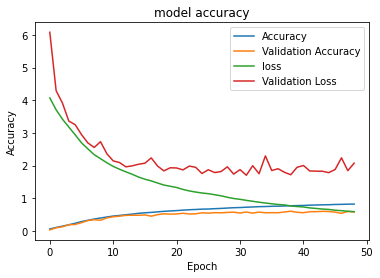

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# cell to load best weights

In [ ]:
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.layers import ELU
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

initializer = keras.initializers.HeNormal()

#building the sequential model

model = Sequential()
model.add(Conv2D(input_shape = input_shape,filters=64,kernel_size=(3,3),padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(ELU(alpha=elu_alpha))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(ELU(alpha=elu_alpha))
model.add(Flatten())
model.add(Dense(units=2048))
model.add(ELU(alpha=elu_alpha))
model.add(Dense(units=2048))
model.add(ELU(alpha=elu_alpha))
model.add(Dense(units=100, activation="softmax"))

model.load_weights('../weights/VGG16_Adam_With_BatchNormalization.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))